# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the Data 

In [3]:
data=pd.read_csv('electricity_bill_dataset.csv')

In [4]:
data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


## Dataset Overview

The **"Indian Household Electricity Consumption Dataset"** is a comprehensive dataset that captures the electricity consumption patterns of Indian households. It includes information about the number of hours each household appliance, such as fans, air conditioners, refrigerators, televisions, monitors, and motor pumps, operates in a month. Additionally, it incorporates demographic factors like the city of residence and the electricity distribution company serving that city.

This dataset is designed to help predict the monthly electricity bills for Indian households based on appliance usage and other relevant factors. It can be used in various applications, such as - Energy management and Consumer insights.

In [5]:
data.shape

(45345, 12)

In [6]:
data.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['Company'].value_counts()

Company
Ringfeder Power Transmission India Pvt. Ltd.                          1486
JSW Energy Ltd.                                                       1477
Guj Ind Power                                                         1476
SJVN Ltd.                                                             1471
Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.    1470
NTPC Pvt. Ltd.                                                        1466
Optibelt Power Transmission India Private Limited                     1463
Kalpataru Power                                                       1456
GE T&D India Limited                                                  1453
KEC International                                                     1442
Reliance Power                                                        1441
Orient Green                                                          1427
Torrent Power Ltd.                                                    1426
L&T Transmission 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [10]:
data['MotorPump'].value_counts()

MotorPump
0    45345
Name: count, dtype: int64

In [11]:
data.shape

(45345, 12)

In [12]:
#As there are only Zeros in MotorPump Column we can drop it
data.drop('MotorPump',axis=1,inplace=True)

In [13]:
int_cols=[i for i in data.columns if data[i].dtypes=='int64']
float_cols=[i for i in data.columns if data[i].dtypes=='float64']
categorical_cols=[i for i in data.columns if data[i].dtypes=='O']

## Correlation with Target

In [14]:
data[int_cols+float_cols].corr()

,Fan,Month,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,TariffRate,ElectricityBill
Fan,1.000000,-0.000672,0.426497,0.563139,0.003201,0.005547,0.098622,0.009861,0.410682
Month,-0.000672,1.000000,0.037002,-0.002973,0.004880,0.004757,-0.002397,0.003666,0.036316
MonthlyHours,0.426497,0.037002,1.000000,0.392823,0.273721,0.429737,0.324485,0.009980,0.958702
Refrigerator,0.563139,-0.002973,0.392823,1.000000,0.010282,0.003906,0.085030,0.002510,0.376816
AirConditioner,0.003201,0.004880,0.273721,0.010282,1.000000,-0.007846,-0.008240,0.000116,0.261845
Television,0.005547,0.004757,0.429737,0.003906,-0.007846,1.000000,-0.000930,0.008486,0.412651
Monitor,0.098622,-0.002397,0.324485,0.085030,-0.008240,-0.000930,1.000000,-0.001447,0.309986
TariffRate,0.009861,0.003666,0.009980,0.002510,0.000116,0.008486,-0.001447,1.000000,0.286226
ElectricityBill,0.410682,0.036316,0.958702,0.376816,0.261845,0.412651,0.309986,0.286226,1.000000


Here we can clearly see that, there is highest correlation between **Monthly Hours** and **Electricity Bill** which is quiet obvious in the real world too.

# EDA

## Integer Categorical Features

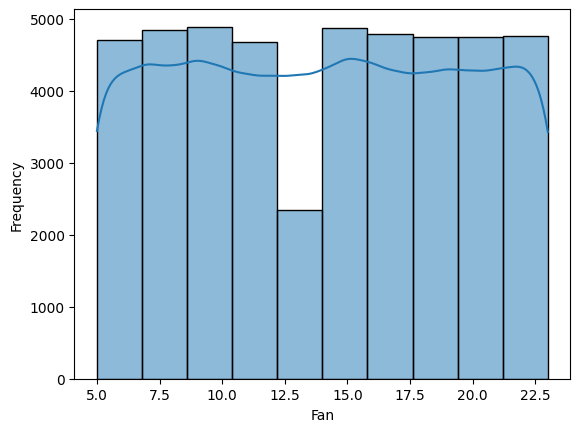

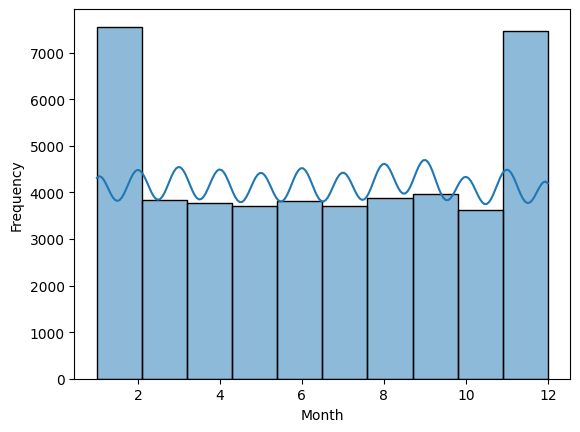

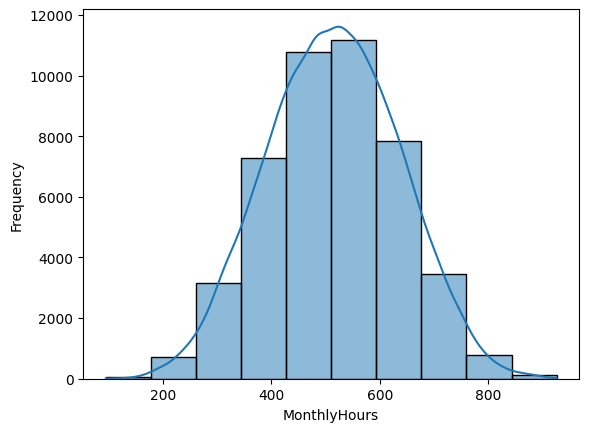

In [15]:
for i in int_cols:
    sns.histplot(data[i],bins=10,kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

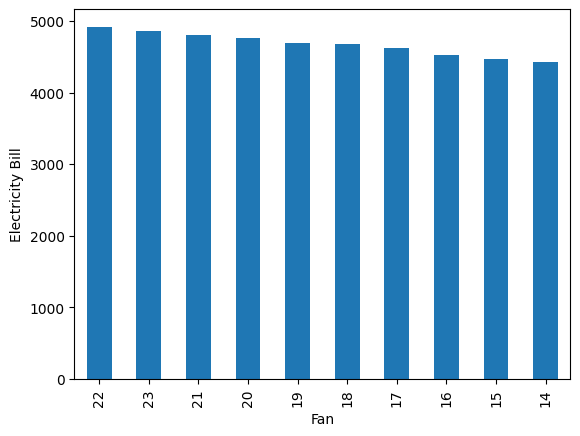

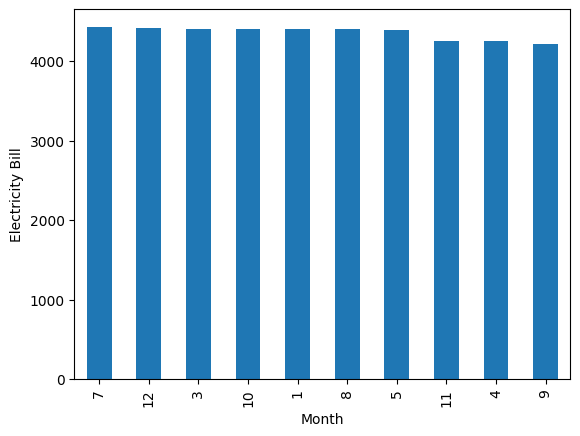

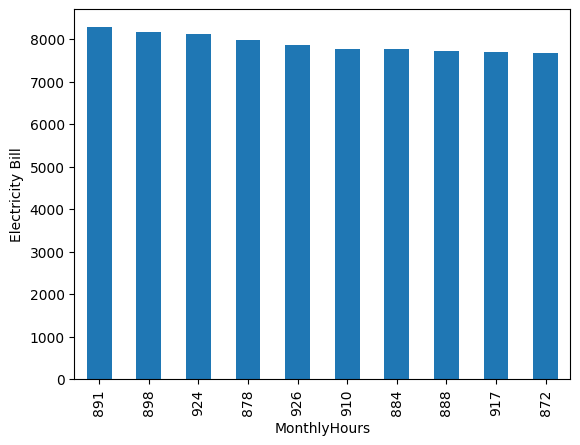

In [16]:
for i in int_cols:
    data.groupby(i)['ElectricityBill'].mean().sort_values(ascending=False).head(10).plot.bar()
    plt.xlabel(i)
    plt.ylabel('Electricity Bill')
    plt.show()

### Insights from Integer Categorical

Here, we can see that :
- If the **Fan** is running for **22 Hours** then the **Electricity Bill** is **Highest**.
- In the **7th (July) Month** the Electricity Bill payed by Consumer is **Highest**.
- The Consumers with **Monthly Hours** 891 are paying **Highest Bill**.

## Object Categorical Features

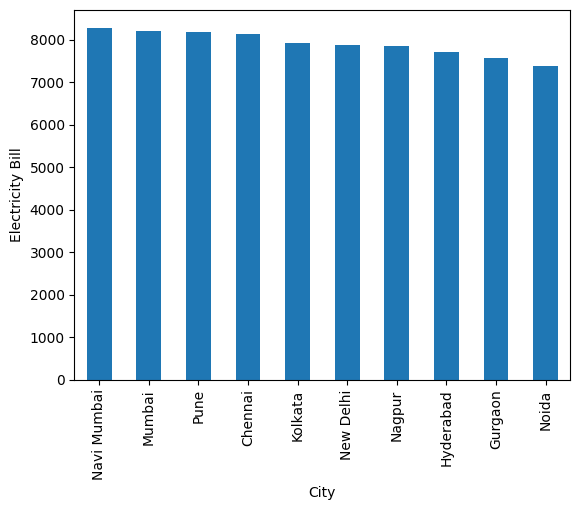

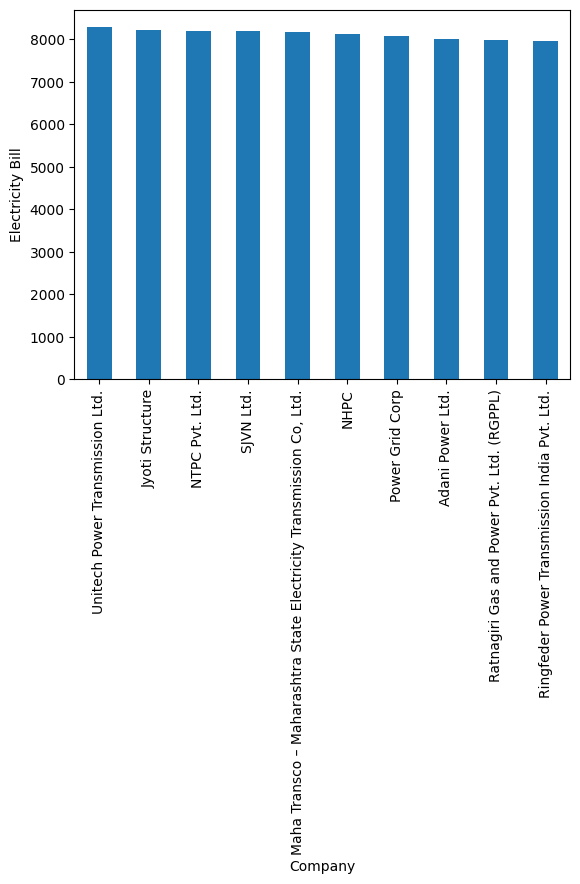

In [17]:
for i in categorical_cols:
    data.groupby(i)['ElectricityBill'].max().sort_values(ascending=False).head(10).plot.bar()
    plt.xlabel(i)
    plt.ylabel('Electricity Bill')
    plt.show()

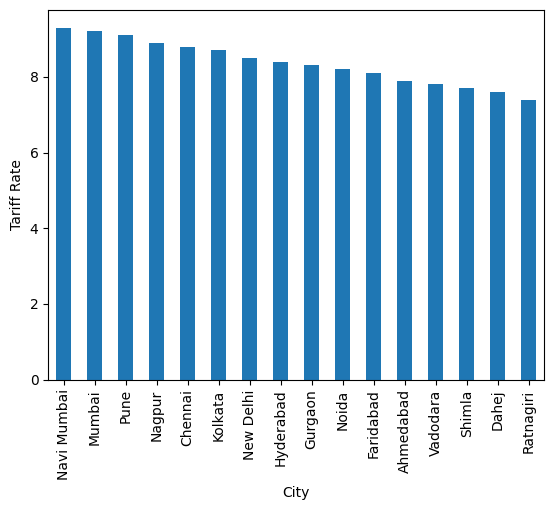

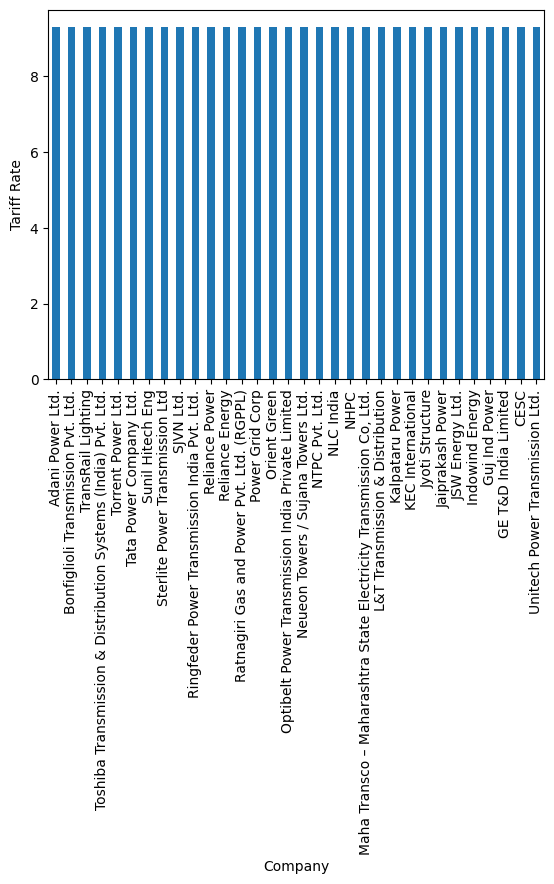

In [18]:
for i in categorical_cols:
    data.groupby(i)['TariffRate'].max().sort_values(ascending=False).plot.bar()
    plt.ylabel('Tariff Rate')
    plt.show()

### Insight from Object Categorical Features

From this we can see that:
- The Consumers of **Navi Mumbai** are paying **Highest Electricity Bill**.
- The Consumers which are getting the **Electricity** from **Unitech Power Transmission Ltd.** are paying **Highest Bills**. 

Here, we can see that:
- The **Tariff Rate** in **Navi Mumbai** is **Highest** and in **Ratnagiri** it is **Lowest**.
- The **Tariff Rate** of **Adani Power Ltd.** is **Highest** and of **Unitech Power Transmission Ltd.** it is **Lowest**

In [19]:
float_cols.remove('ElectricityBill')

## Continuous Features

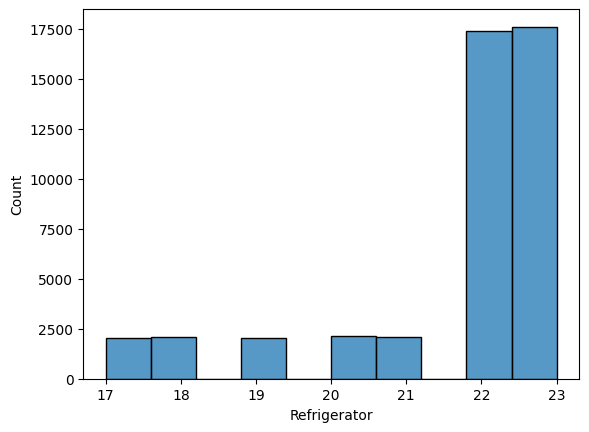

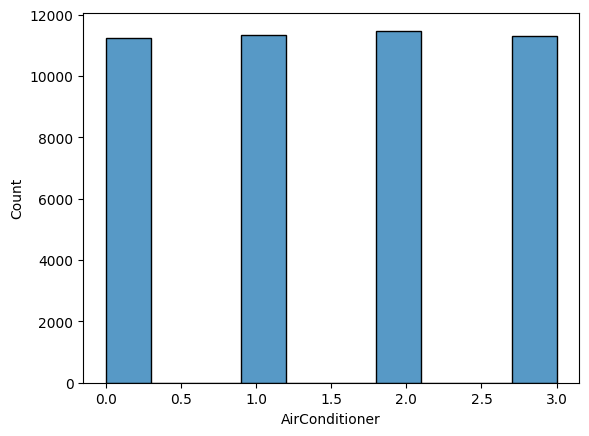

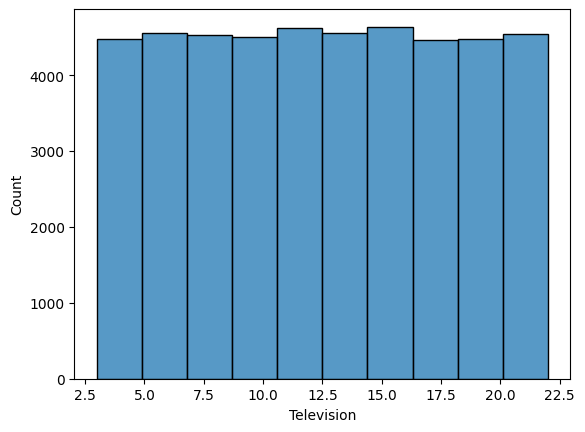

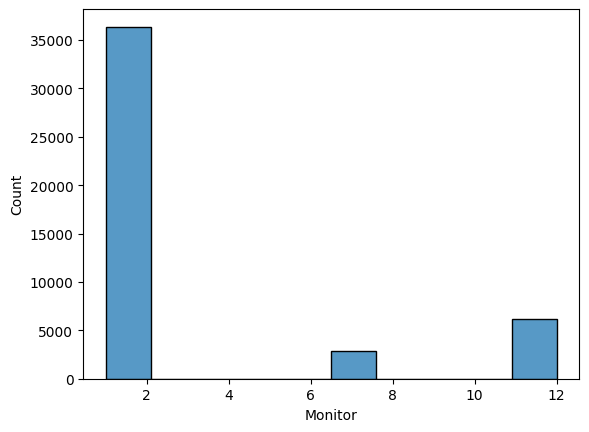

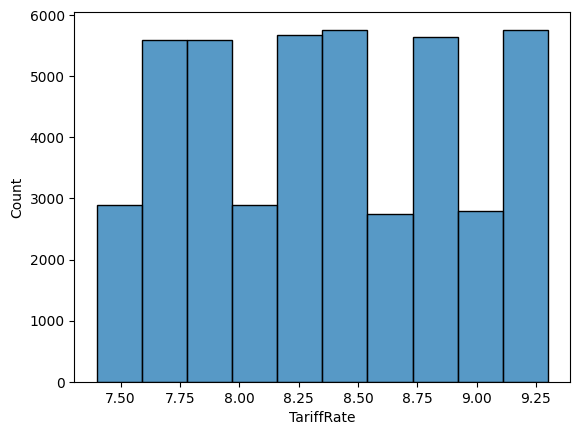

In [20]:
for i in float_cols:
    sns.histplot(data[i],bins=10)
    plt.show()

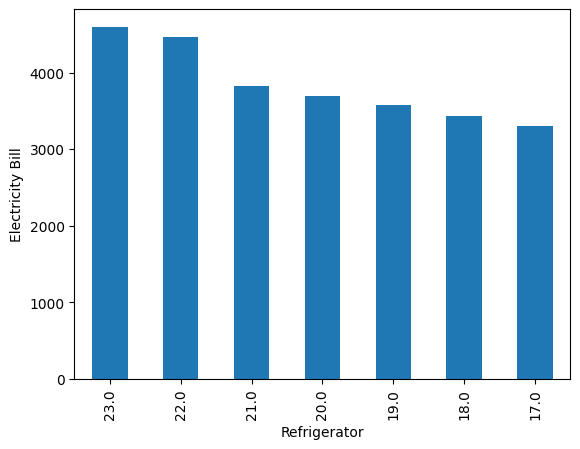

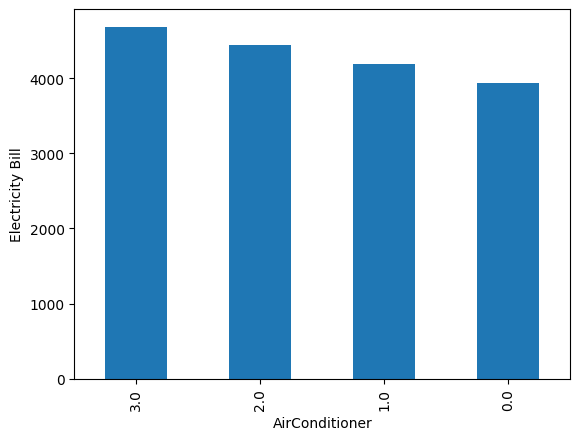

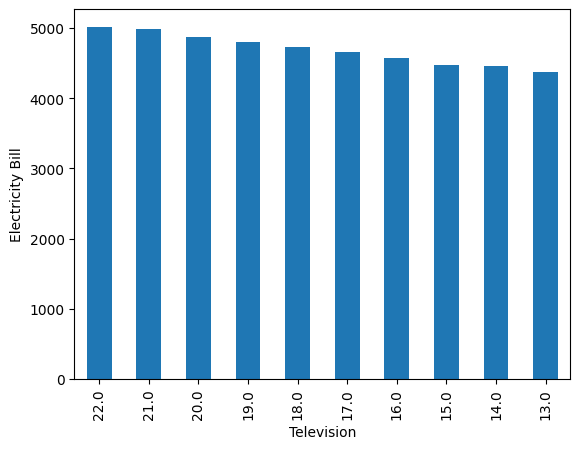

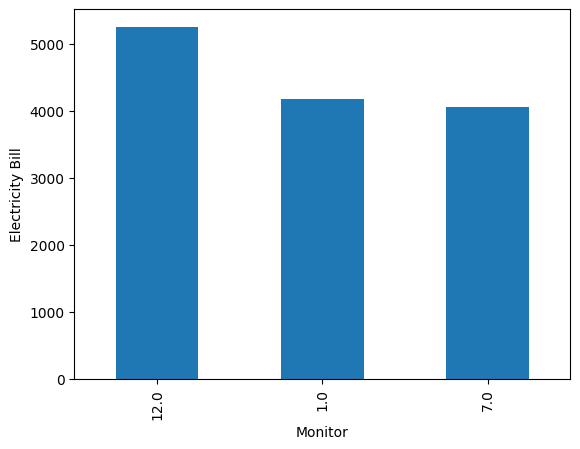

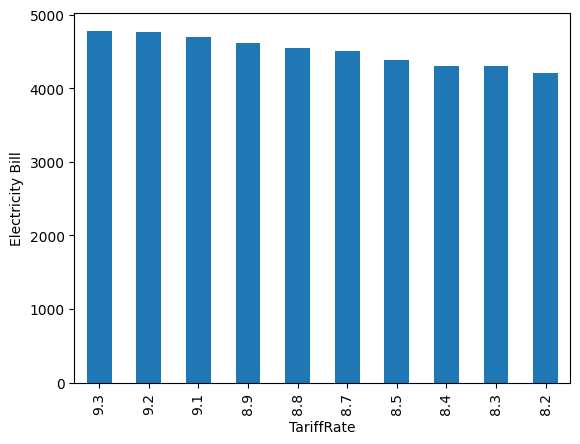

In [21]:
for i in float_cols:
    data.groupby(i)['ElectricityBill'].mean().sort_values(ascending=False).head(10).plot.bar()
    plt.xlabel(i)
    plt.ylabel('Electricity Bill')
    plt.show()

### Insights from Continuous Features

Here we can clearly see that,
- The features which are **Float Type** are not **Normally Distributed**.
- The **Number of Hours** are **Increasing** the **Electricity Bill** is also **Increasing** which is obvious.

## Data Distributition

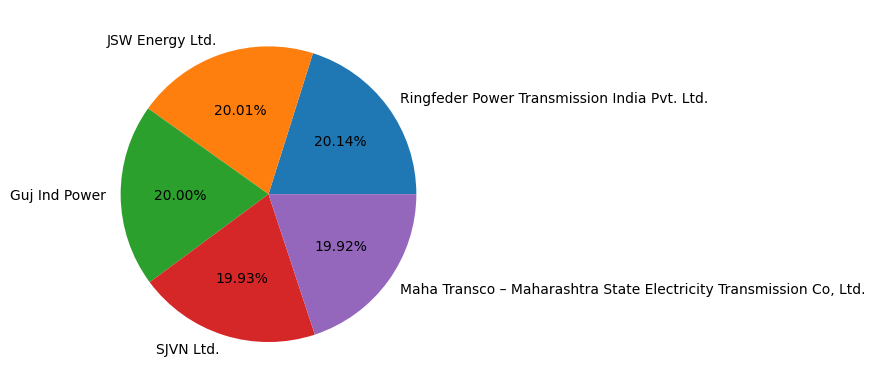

In [22]:
plt.pie(data['Company'].value_counts().head(5),autopct='%.2f%%',labels=data['Company'].value_counts().head(5).index)
plt.show()

Here we can see that most of the **Consumers** are consuming **Electricity** from these providers.

In [23]:
data[int_cols+float_cols].corr()

,Fan,Month,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,TariffRate
Fan,1.000000,-0.000672,0.426497,0.563139,0.003201,0.005547,0.098622,0.009861
Month,-0.000672,1.000000,0.037002,-0.002973,0.004880,0.004757,-0.002397,0.003666
MonthlyHours,0.426497,0.037002,1.000000,0.392823,0.273721,0.429737,0.324485,0.009980
Refrigerator,0.563139,-0.002973,0.392823,1.000000,0.010282,0.003906,0.085030,0.002510
AirConditioner,0.003201,0.004880,0.273721,0.010282,1.000000,-0.007846,-0.008240,0.000116
Television,0.005547,0.004757,0.429737,0.003906,-0.007846,1.000000,-0.000930,0.008486
Monitor,0.098622,-0.002397,0.324485,0.085030,-0.008240,-0.000930,1.000000,-0.001447
TariffRate,0.009861,0.003666,0.009980,0.002510,0.000116,0.008486,-0.001447,1.000000


In [24]:
data['Company'].nunique()

32

In [25]:
data['City'].nunique()

16

# Model Training

### Encoding of Categorical Features

In [26]:
company=data['Company'].value_counts().to_dict()

In [41]:
# Frequency encoding as it has too many unique values
data['Company']=data['Company'].map(company)

In [28]:
data=pd.get_dummies(columns=['City'],drop_first=True,data=data)

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('ElectricityBill',axis=1),data['ElectricityBill'],train_size=0.7,random_state=123)

### Model Training

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr_pred=lr.predict(x_test)

### Model Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, median_absolute_error, explained_variance_score, max_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lr_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, lr_pred)
print("R-squared (R2):", r_squared)

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, lr_pred)
print("Median Absolute Error (MedAE):", medae)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, lr_pred)
print("Explained Variance Score:", explained_variance)

# Calculate Maximum Error (Max Error)
max_err = max_error(y_test, lr_pred)
print("Maximum Error (Max Error):", max_err)

Mean Absolute Error (MAE): 49.08906078077221
Mean Squared Error (MSE): 5034.114409333882
Root Mean Squared Error (RMSE): 70.95149335520628
R-squared (R2): 0.9956056568760877
Median Absolute Error (MedAE): 31.38909210478755
Explained Variance Score: 0.9956062905036142
Maximum Error (Max Error): 349.18163185721096


### Cross Validation of Model

In [34]:
from sklearn.model_selection import cross_val_score
print('Mean Cross Val Score :',cross_val_score(lr,x_train,y_train,cv=10,scoring='r2').mean())
print('Minimum Cross Val Score :',cross_val_score(lr,x_train,y_train,cv=10,scoring='r2').min())
print('Maximum Cross Val Score :',cross_val_score(lr,x_train,y_train,cv=10,scoring='r2').max())

Mean Cross Val Score : 0.9956722239985389
Minimum Cross Val Score : 0.9954485765666914
Maximum Cross Val Score : 0.9958601152961558
